In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('PSID.csv')
df

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids,married
0,1,4,4,39,12.0,77250,2940,2,married
1,2,4,6,35,12.0,12000,2040,2,divorced
2,3,4,7,33,12.0,8000,693,1,married
3,4,4,173,39,10.0,15000,1904,2,married
4,5,5,2,47,9.0,6500,1683,5,married
...,...,...,...,...,...,...,...,...,...
4851,4852,9297,2,42,2.0,3000,1040,4,married
4852,4853,9301,2,43,12.0,0,0,2,married
4853,4854,9302,1,37,8.0,22045,2793,98,divorced
4854,4855,9305,2,40,6.0,134,30,3,married


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4856 entries, 0 to 4855
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Seq No    4856 non-null   int64  
 1   intnum    4856 non-null   int64  
 2   persnum   4856 non-null   int64  
 3   age       4856 non-null   int64  
 4   educatn   4855 non-null   float64
 5   earnings  4856 non-null   int64  
 6   hours     4856 non-null   int64  
 7   kids      4856 non-null   int64  
 8   married   4856 non-null   object 
dtypes: float64(1), int64(7), object(1)
memory usage: 341.6+ KB


In [4]:
df.describe()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids
count,4856.000000,4856.000000,4856.000000,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,2428.500000,4598.101318,59.213550,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,1401.950784,2761.971174,79.748556,5.595116,18.449502,15985.447449,947.175837,14.887856
min,1.000000,4.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,1214.750000,1905.000000,2.000000,34.000000,12.000000,85.000000,32.000000,1.000000
50%,2428.500000,5464.000000,4.000000,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,3642.250000,6655.000000,170.000000,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,4856.000000,9306.000000,205.000000,50.000000,99.000000,240000.000000,5160.000000,99.000000


<AxesSubplot:>

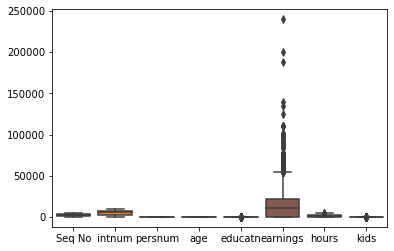

In [5]:
sns.boxplot(data = df )

In [6]:
df.drop(labels = ['Seq No' , 'intnum' , 'persnum'] , axis = 1 , inplace = True)

In [7]:
df

,age,educatn,earnings,hours,kids,married
0,39,12.0,77250,2940,2,married
1,35,12.0,12000,2040,2,divorced
2,33,12.0,8000,693,1,married
3,39,10.0,15000,1904,2,married
4,47,9.0,6500,1683,5,married
...,...,...,...,...,...,...
4851,42,2.0,3000,1040,4,married
4852,43,12.0,0,0,2,married
4853,37,8.0,22045,2793,98,divorced
4854,40,6.0,134,30,3,married


In [8]:
ear = df.earnings.quantile(0.98)


In [9]:
ear

52878.89999999985

In [10]:
df_nan_out = df[df.earnings < 53000.0 ]


<AxesSubplot:xlabel='earnings'>

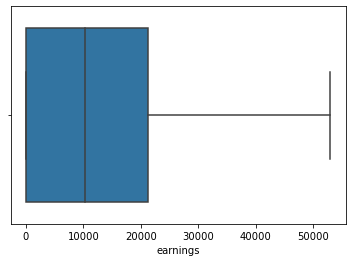

In [11]:
sns.boxplot(data = df_nan_out , x = 'earnings')

In [12]:
df = df_nan_out


<AxesSubplot:xlabel='hours'>

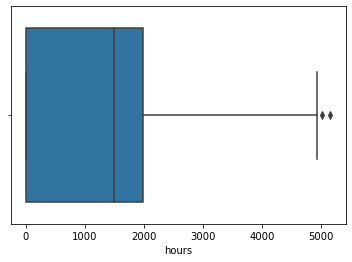

In [13]:
sns.boxplot(data = df , x  ='hours')

In [14]:
hr = df.hours.quantile(0.9994)
hr

4940.0

In [15]:
df = df[df.hours < 4550]

<AxesSubplot:xlabel='hours'>

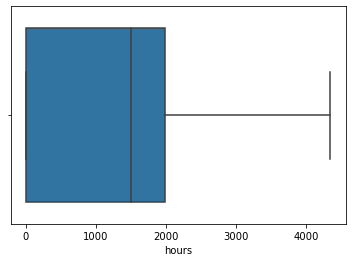

In [16]:
sns.boxplot(data = df , x  ='hours')

In [17]:
kid = df.kids.quantile(0.99)
kid

98.0

In [18]:
df = df[df.kids < 6]

<AxesSubplot:xlabel='kids'>

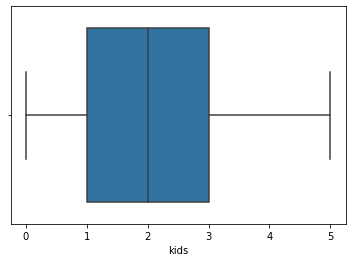

In [19]:
sns.boxplot(data = df  , x = 'kids')

<AxesSubplot:xlabel='educatn'>

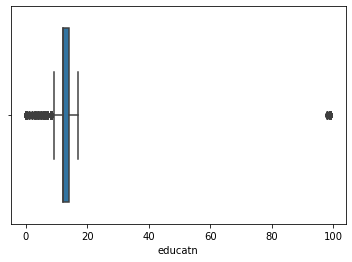

In [20]:
sns.boxplot(data = df ,  x = 'educatn')

In [21]:
edu = df.educatn.quantile(0.955)
edu

17.0

In [22]:
edu_low = df.educatn.quantile(0.17)
edu_low

11.0

In [23]:
df = df[(df.educatn < 17) & (df.educatn > 11)]

<AxesSubplot:xlabel='educatn'>

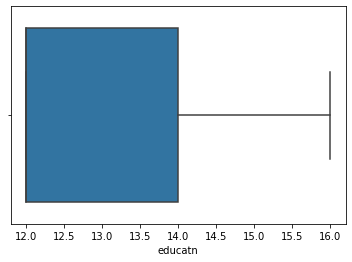

In [24]:
sns.boxplot(data = df ,  x = 'educatn')

In [25]:
df.shape

(3287, 6)

<AxesSubplot:>

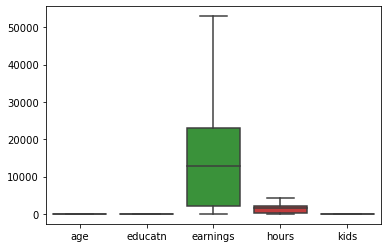

In [26]:
sns.boxplot(data= df)

Correlation between earnings and hours

<AxesSubplot:xlabel='hours', ylabel='earnings'>

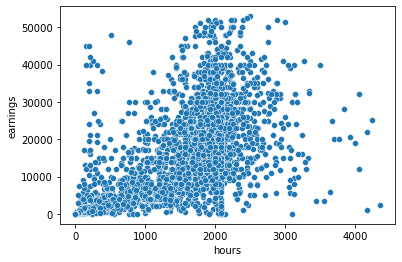

In [27]:
sns.scatterplot(data= df , x = 'hours' , y = 'earnings'  )

#There are no correlation

In [28]:
df.fillna(value = df['educatn'].mean() , inplace = True )

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 1 to 4852
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3287 non-null   int64  
 1   educatn   3287 non-null   float64
 2   earnings  3287 non-null   int64  
 3   hours     3287 non-null   int64  
 4   kids      3287 non-null   int64  
 5   married   3287 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 179.8+ KB


<AxesSubplot:>

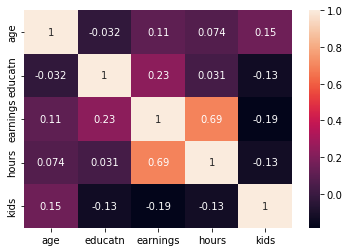

In [31]:
sns.heatmap(df.corr() , annot = True  )